In [2]:
#1. extract data and read the file

%matplotlib inline
import pylab as pl
import numpy as np
import pandas as pd

X = []
samples_x = []

f = open("genotypes.csv","r")

#strip samples_ids
for line in f:
    sv = line.strip().split(",")
    samples_x.append(sv[0])
    
    row = []
    for element in sv[1:]:
        row.append(str(element))
    X.append(row)
    
f.close()

X = np.array(X)
samples_x = np.array(samples_x)

f.close()

#X.shape

print(X)




[['1_10904' '1_61822' '1_156628' ... '5_26922046' '5_26924854'
  '5_26957850']
 ['G' 'G' 'G' ... '?' 'T' 'A']
 ['G' 'G' 'G' ... 'A' 'T' 'A']
 ...
 ['G' 'A' 'G' ... 'T' 'T' 'A']
 ['G' 'G' 'A' ... 'A' 'T' 'A']
 ['G' 'G' 'G' ... 'A' 'T' 'C']]


# data-preprocessing

In [ ]:
%matplotlib inline
import pylab as pl
import numpy as np
from sklearn.impute import SimpleImputer

print("No Samples:\t%d" % X.shape[0])
print("No Features:\t%d" % X.shape[1])
print()

X = pd.read_csv("genotypes.csv", delimiter=",")
y = pd.read_csv("phenotype_values.csv", delimiter=",")

E = pd.merge(X,y)

X = E.loc[:,"1_10904":"5_26957850"]
y = E.loc[:,"phenotype_values"]
y = y.to_numpy()

Xr = X.replace(['?'],[100])

imputer = SimpleImputer(missing_values=100,strategy='most_frequent')
Xmf = imputer.fit_transform(Xr)

print(Xr)
print(Xmf)
#need to change to 0 and 2 


#convert string to float
Xdf = pd.DataFrame(Xmf)
for col in Xdf.columns:
    val = Xdf[col].max()
    Xdf[col]=np.where(Xdf[col]==val,0,2)
Xdf = Xdf.to_numpy()

print(Xdf)


# dimensionality reduction(PCA analysis)

In [16]:
#standardise the data
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
Xn = scaler.fit_transform(Xdf)

#compute the covariance matrix on the standardised data
n = Xdf.shape[0]
C = 1/(n-1) * np.dot(Xn.T,Xn)

#eigendecompose the matrix  𝐂  into its eigenvalues and eigenvector
import numpy.linalg as linalg
d, V = linalg.eig(C)

#sort the eigenvalues in decreasing order, re-sort the columns of the eigenvector matrix 𝑉  using the indices from the sorting of the eigenvalues
ind = np.argsort(d)[::-1]
d = d[ind]
V = V[:,ind]

Xr = np.dot(Xn,V[:,0:1000])

print(Xr)

#calculate how much of the total variance the PCs account for
ratios_variance_explained = d/d.sum()

va = ratios_variance_explained[0:1000].sum()


print("First 1000 PCs account for %.2f %% of the total variance!" % (va*100))


[[-8.68376349e+00+0.j -5.60131328e+00+0.j  9.34610142e+00+0.j ...
   7.62645725e-01+0.j -3.91271658e-01+0.j  4.47480771e-01+0.j]
 [-9.09791484e+00+0.j  2.01712253e+00+0.j  5.23998996e+00+0.j ...
   8.30489368e-01+0.j  1.62805750e+00+0.j  9.43439444e-02+0.j]
 [ 4.01402629e+01+0.j -1.81938059e+01+0.j -7.44733592e+00+0.j ...
   1.54980833e+00+0.j -1.75373738e-02+0.j  3.79840819e-01+0.j]
 ...
 [ 3.36663967e+01+0.j  6.91548467e+00+0.j  2.93889646e+00+0.j ...
   1.65162263e+00+0.j -2.26837294e+00+0.j -5.47490890e-01+0.j]
 [-7.26679778e+00+0.j  3.66994226e+00+0.j  5.88215878e+00+0.j ...
  -1.91928172e+00+0.j -1.31333746e+00+0.j -1.05577672e+00+0.j]
 [-9.36925283e+00+0.j  9.02793145e+00+0.j -3.59236321e+00+0.j ...
   1.41718784e-01+0.j  1.16382330e+00+0.j  1.65280364e-01+0.j]]
First 1000 PCs account for 90.89 % of the total variance!


C:\Users\zhang\AppData\Local\Temp/ipykernel_9504/906837105.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  print("First 1000 PCs account for %.2f %% of the total variance!" % (va*100))


C:\Users\zhang\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\zhang\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x23d172afd90>,
  ...],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0,

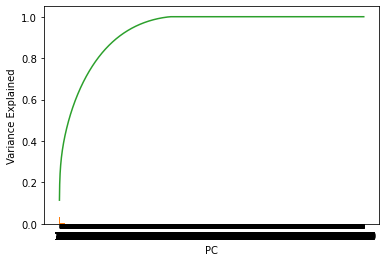

In [18]:
#importing required libraries
import pylab as pl
import numpy as np

xticks = np.arange(1,len(ratios_variance_explained)+1)
pl.bar(xticks, ratios_variance_explained)
pl.ylabel("Variance Explained")
pl.xlabel("PC")
pl.xticks(xticks)

xticks = np.arange(1,len(ratios_variance_explained)+1)
pl.bar(xticks, ratios_variance_explained)
pl.plot(xticks, np.cumsum(ratios_variance_explained),color="tab:green")
pl.ylabel("Variance Explained")
pl.xlabel("PC")
pl.xticks(xticks)



In [ ]:
#fig = pl.figure(figsize=(7,7))
#ax = fig.add_subplot(111)


#ax.scatter(Xr[:,0],Xr[:,1])

#Set axis labels
#ax.set_xlabel("PC 1")
#ax.set_ylabel("PC 2")
#show grid in grey and set top and right axis to invisible
#ax.grid(color="#CCCCCC")
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#pl.tight_layout()

In [5]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Split data into train and test
Xdf_train, Xdf_test, y_train, y_test = train_test_split(Xdf,y, test_size=0.2)

print("Full Data:\t" + str(Xdf.shape))
print("Train Data:\t" + str(Xdf_train.shape))
print("Test Data:\t" + str(Xdf_test.shape))

Full Data:	(1826, 5000)
Train Data:	(1460, 5000)
Test Data:	(366, 5000)


from sklearn import decomposition

pca = decomposition.PCA()
pca.n_components = 500
pca_data = pca.fit_transform(Xdf_train)
pca_data

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto')
knn_classifier.fit(pca_data, y_train)
knn_classifier.score(pca.transform(Xdf_test), y_test)

C:\Users\zhang\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\zhang\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x23ca3323580>,
  ...],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0,

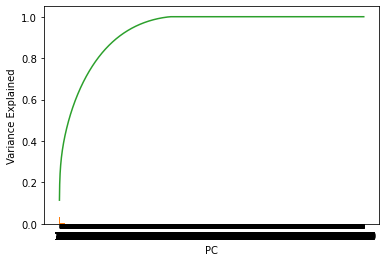